## Programming for Data Analysis - Project 2021
---
Jody Bradley (G00387878@gmit.ie)

### Assignment
- Create a data set by simulating a real-world phenomeon, modeled and synthesised using Python. 
- Choose a real world phenomenon that can be measured and for which at least 100 data points can be collected over at least four different variables.
- Investigate the types of variables involved, their likely distributions and their relationships with each other.
- Synthesis / simulate a data set as closely matching their properties as possible. 
- Detail your research and implement the simulation in a Jupyter notebook - the data itself can simply be displated in an output cell within the notebook.

### Introduction




### Generating synthetic data with Scikit-Learn

https://python-course.eu/machine-learning/artificial-datasets-with-scikit-learn.php



### Dataset
https://archive-beta.ics.uci.edu/ml/datasets/palmer+penguins-3

The Palmer penguins dataset was collected for research that was conducted as part of the Palmer Station, Antarctica, Long-Term Ecological Research program. The purpose of the research was to study Antarctic penguins’ foraging behavior and its relationship with environmental variability.

The dataset comprises data for three species of penguin: Adélie (152 penguins), Gentoo (124 penguins), and Chinstrap (68 penguins) giving a total sample size of 344*. 

NOTE: I cleansed the data by manually removing two samples where numerical data was not measured (captured as "NA"). Therefore, the dataset which I'm working with comprises 342 samples. There are also 9 samples where the gender has not been determined, however, these have remained in the dataset. 

The following variables are measured:

* species: The sample consists of three species - Adélie (152 penguins), Gentoo (124 penguins), and Chinstrap (68 penguins).
* island: Samples were taken from three islands - Biscoe, Dream and Torgersen.
* bill_length: Length of the penguin's bill (in mm).
* bill_depth: Depth of the penguin's bill (in mm).
* flipper_length: (in mm).
* body_mass: (in grams).
* sex: Male / Female / NA.


### Load Python Libraries

In [1]:
# import pandas and sklearn neighbors.
import pandas as pd
import sklearn.neighbors as nei

### Load Dataset

The penguins dataset is saved in the repository as a CSV file.

In [2]:
# load the penguins data set.
df = pd.read_csv('penguins.csv')

# View data.
df


,species,island,bill_length,bill_depth,flipper_length,body_mass,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
337,Chinstrap,Dream,55.8,19.8,207,4000,male
338,Chinstrap,Dream,43.5,18.1,202,3400,female
339,Chinstrap,Dream,49.6,18.2,193,3775,male
340,Chinstrap,Dream,50.8,19.0,210,4100,male


### Describe the Data

We can df.describe() to view some basic statistical details of the data set, inlcuding the percentile, mean and standard deviation. 

In [3]:
df.describe()

,bill_length,bill_depth,flipper_length,body_mass
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Visualise the Data

In order to see what the data looks like, I've used seaborn pairplot to plot the pairwise relationships in the dataset. This function creates a grid of axes that shows the relationships between each of the variables. We have seperated the data points by species using the "hue" parameter. 

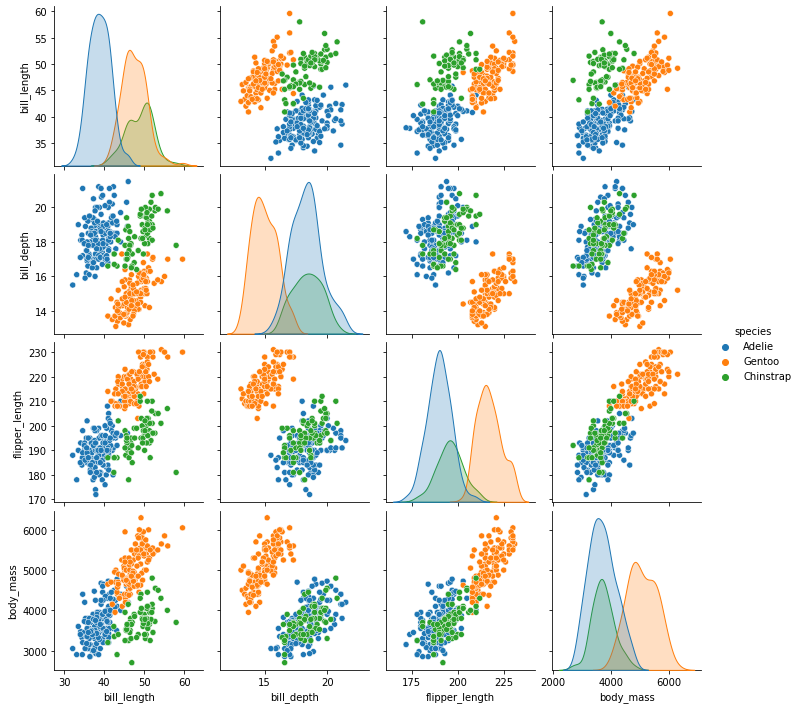

In [4]:
# import seaborn package.
import seaborn as sns

# Plot the penguin data with a pair plot. 
sns.pairplot(df, hue='species')

The distributions are normally distributed for the four numerical variables of each species, however, there is a clear differentiation between each of the species.The Gentoo has the highest body mass out of the three penguin species, and they also have the highest flipper length. Interestingly, the Gentoo has the smallest bill depth but the highest bill lenght. In contrast, the Adelie is the smallest penguin, but has the deepest bill. 

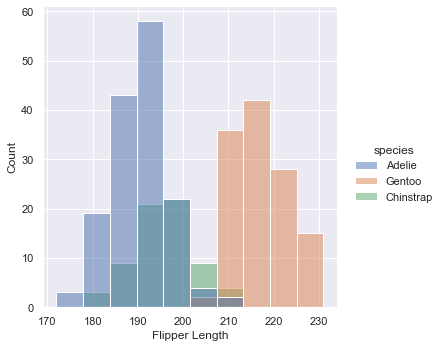

In [5]:
sns.set_theme()

fl = sns.displot(df, x="flipper_length", hue="species")
fl.set(xlabel = "Flipper Length")


We can see from the above plot that the most common flipper length is c. 195 mm, but as the distribution appears bimodal (as ther are two peaks), this number does not represent the data well. [https://seaborn.pydata.org/tutorial/distributions.html

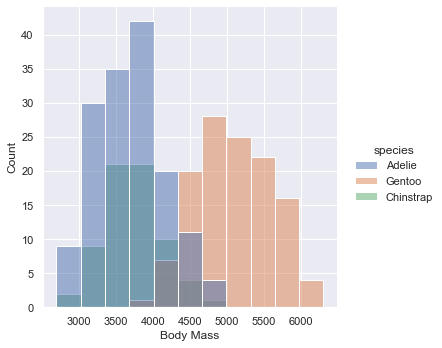

In [6]:
bm = sns.displot(df, x="body_mass", hue="species") 
bm.set(xlabel = "Body Mass")


We can see from the above plot that the most common body mass is c.65 grams. This is a normal distribution with a right skew (i.e. "positively skewed"). 


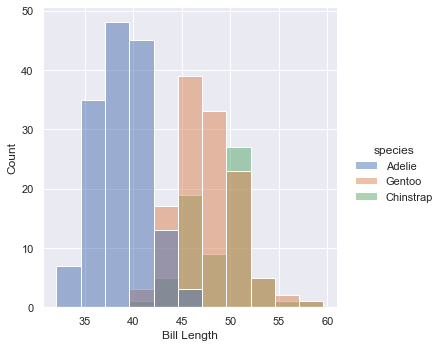

In [7]:
bl = sns.displot(df, x="bill_length", hue="species")
bl.set(xlabel = "Bill Length")


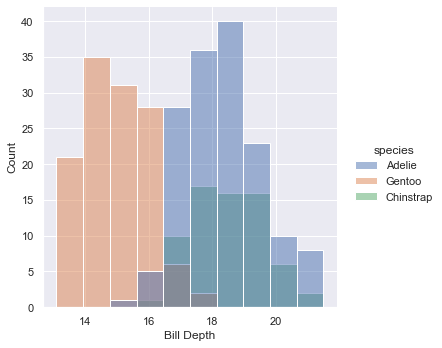

In [8]:
bd = sns.displot(df, x="bill_depth", hue="species")
bd.set(xlabel = "Bill Depth")

Again, the distribution here appears bimodal

### Generating Data

In [9]:
df.describe()

,bill_length,bill_depth,flipper_length,body_mass
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [10]:
import numpy as np
# set a random seed
#np.random.seed(5)
 
s1 = pd.DataFrame({'species':np.random.choice(a=['Adélie','Gentoo','Chinstrap'], size=342, p=[0.34,0.33,0.33]),
                    'bill_depth':np.random.uniform(13.1,21.5, 342),
                    'flipper_length':np.random.uniform(172.0,231.0,342),
                    'body_mass':np.random.uniform(270.0,6300.0, 342),
                    'gender':np.random.choice(a=['male','female'], size=342, p=[0.5,0.5])})

s1

,species,bill_depth,flipper_length,body_mass,gender
0,Adélie,13.484797,204.322524,1992.506426,male
1,Adélie,19.718639,191.627173,2696.507581,male
2,Gentoo,17.087616,227.567944,3625.258459,female
3,Adélie,16.498730,221.723206,2235.856249,male
4,Gentoo,18.314139,228.641162,1117.988547,male
...,...,...,...,...,...
337,Chinstrap,13.860931,223.884745,5716.056858,male
338,Chinstrap,19.347031,229.200557,5996.554441,female
339,Gentoo,17.308907,197.833068,1695.019865,female
340,Adélie,17.516686,207.558289,3415.889351,female


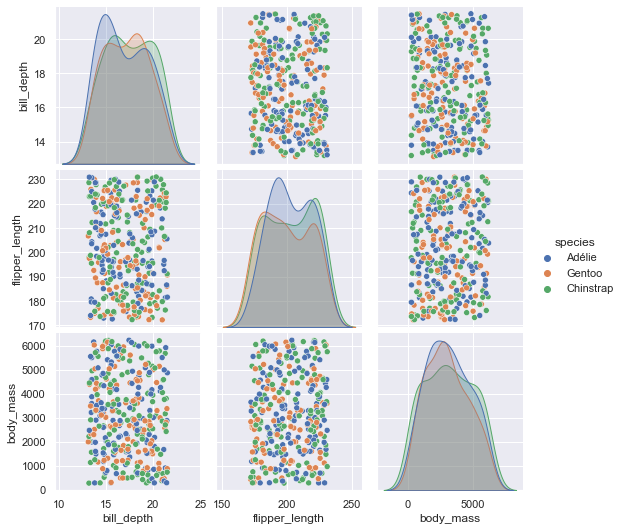

In [11]:
sns.pairplot(s1, hue='species')

As we can see, the above simulation does not accurately match the real life data as there is no correlation between the variables. How can we make this more accurate?

As each of the three species are quite distinct in their other variables, if we can generate the species first and then use "if statements" to determine the other variables based on the species, we might be able to make the data more accurate.


In [12]:
#s2 = pd.DataFrame({'species':np.random.choice(a=['Adélie','Gentoo','Chinstrap'], size=342, p=[0.34,0.33,0.33]),
#                    'bill_depth':np.random.uniform(13.1,21.5, 342),
#                    'flipper_length':np.random.uniform(172.0,231.0,342),
#                    'body_mass':np.random.uniform(270.0,6300.0, 342),
#                    'gender':np.random.choice(a=['male','female'], size=342, p=[0.5,0.5])})

sp1 = np.random.choice(a=['Adélie','Gentoo','Chinstrap'], p=[0.34,0.33,0.33])

if sp1 == "Gentoo":
    print("Gentoo!!!")
    
elif sp1 == 'Adélie':
    print("Adelie!!!")
    
else:
    print("Chinstrap!!!")

Adelie!!!


In [13]:
sp1 = np.random.choice(a=['Adélie','Gentoo','Chinstrap'], p=[0.34,0.33,0.33])

if sp1 == "Gentoo":
    bill_depth = np.random.uniform(13.1,17.3, 342)
    flipper_length = np.random.uniform(203.0, 231.0, 342)
    body_mass = np.random.uniform(3950.0, 6300.0, 342)
    gender = np.random.choice(a=['male','female'], size=342, p=[0.5,0.5])
    #print("Gentoo")
    
elif sp1 == 'Adélie':
    bill_depth = np.random.uniform(15.5,21.5, 342)
    flipper_length = np.random.uniform(172.0,210.0, 342)
    body_mass = np.random.uniform(2850.0,4775.0, 342)
    gender = np.random.choice(a=['male','female'], size=342, p=[0.5,0.5])
    
else:
    bill_depth = np.random.uniform(16.4,20.8, 342)
    flipper_length = np.random.uniform(178.0,212.0, 342)
    body_mass = np.random.uniform(2700.0,4800.0, 342)
    gender = np.random.choice(a=['male','female'], size=342, p=[0.5,0.5])

pd.DataFrame({'species':sp1,
              'bill_depth':bill_depth,
              'flipper_length':flipper_length,
              'body_mass':body_mass,
              'gender':gender})

,species,bill_depth,flipper_length,body_mass,gender
0,Chinstrap,18.673182,197.259741,3799.661579,male
1,Chinstrap,17.468513,192.403105,3411.049923,female
2,Chinstrap,16.434492,192.291614,4399.286197,female
3,Chinstrap,18.000944,209.406253,4113.128156,female
4,Chinstrap,16.829168,211.898691,4668.698360,male
...,...,...,...,...,...
337,Chinstrap,16.994014,204.602780,4698.967769,male
338,Chinstrap,18.134260,186.504892,4225.130627,female
339,Chinstrap,19.408691,180.620296,4022.757509,female
340,Chinstrap,19.802994,192.676092,3345.125980,male


In [14]:
from itertools import repeat

for i in range(200):
    sp2 = np.random.choice(a=['Adélie','Gentoo','Chinstrap'], p=[0.34,0.33,0.33])

    if sp2 == "Gentoo":
        bill_depth = np.random.uniform(13.1,17.3, 342)
        flipper_length = np.random.uniform(203.0, 231.0, 342)
        body_mass = np.random.uniform(3950.0, 6300.0, 342)
        gender = np.random.choice(a=['male','female'], size=342, p=[0.5,0.5])

    elif sp2 == 'Adélie':
        bill_depth = np.random.uniform(15.5,21.5, 342)
        flipper_length = np.random.uniform(172.0,210.0, 342)
        body_mass = np.random.uniform(2850.0,4775.0, 342)
        gender = np.random.choice(a=['male','female'], size=342, p=[0.5,0.5])

    else:
        bill_depth = np.random.uniform(16.4,20.8, 342)
        flipper_length = np.random.uniform(178.0,212.0, 342)
        body_mass = np.random.uniform(2700.0,4800.0, 342)
        gender = np.random.choice(a=['male','female'], size=342, p=[0.5,0.5])

pd.DataFrame({'species':sp2,
              'bill_depth':bill_depth,
              'flipper_length':flipper_length,
              'body_mass':body_mass,
              'gender':gender})

,species,bill_depth,flipper_length,body_mass,gender
0,Gentoo,13.929605,215.246103,4585.457512,female
1,Gentoo,15.652707,212.962028,5416.027232,male
2,Gentoo,16.012070,217.424678,4489.625911,female
3,Gentoo,15.455978,222.550534,3977.982038,female
4,Gentoo,16.947001,222.968700,4274.684055,female
...,...,...,...,...,...
337,Gentoo,13.440389,205.682041,5457.296233,female
338,Gentoo,15.981992,229.623698,4335.277018,female
339,Gentoo,15.223184,221.490526,4635.394344,female
340,Gentoo,14.574302,211.349577,4097.060200,female


In [15]:
for i in range(1):
    x = np.random.choice(a=['Adélie','Gentoo','Chinstrap'], size=342, p=[0.34,0.33,0.33])

a = ""
b = ""
c = ""
d = ""

sampledf = pd.DataFrame({'species':x,
              'bill_depth':a,
              'flipper_length':b,
              'body_mass':c,
              'gender':d})

sampledf

,species,bill_depth,flipper_length,body_mass,gender
0,Adélie,,,,
1,Adélie,,,,
2,Chinstrap,,,,
3,Chinstrap,,,,
4,Chinstrap,,,,
...,...,...,...,...,...
337,Chinstrap,,,,
338,Adélie,,,,
339,Gentoo,,,,
340,Gentoo,,,,


In [16]:
sampledf['species'].value_counts() 

Gentoo       116
Adélie       116
Chinstrap    110
Name: species, dtype: int64

In [17]:
if "Gentoo" == sampledf.species.all():
    bill_depth = np.random.uniform(13.1,17.3, 342)

bill_depth

array([13.92960534, 15.6527075 , 16.01206985, 15.45597756, 16.94700132,
       15.15565143, 14.7898523 , 16.60126066, 14.60513184, 14.46779418,
       16.77364214, 16.37158598, 15.99049732, 16.5544738 , 14.59074023,
       13.32809201, 14.04324771, 14.39853365, 13.78320065, 17.07961593,
       14.1755144 , 14.98780224, 15.75910654, 14.99542845, 16.53348545,
       15.29033924, 13.3545062 , 13.96752454, 16.9150756 , 16.30114694,
       16.55250618, 16.57809127, 16.19495237, 16.7175636 , 15.95853968,
       13.50640067, 15.29089795, 14.08840839, 16.4842011 , 13.15425358,
       16.58109207, 13.40102871, 16.83415826, 14.26814173, 14.71941555,
       13.39191654, 14.86610317, 13.60482734, 13.94551937, 16.46417908,
       14.21383379, 14.47076616, 15.04169907, 13.46543065, 13.76758637,
       14.89330169, 15.60436787, 13.64168686, 15.46735244, 17.20279272,
       16.91560583, 17.24545189, 13.65950231, 15.30470086, 13.66552839,
       15.84272247, 14.65878881, 15.81680952, 17.02412267, 13.29

In [18]:
for i in range(1):
    x = np.random.choice(a=['Adélie','Gentoo','Chinstrap'], size=342, p=[0.34,0.33,0.33])

sampledf = pd.DataFrame({'species':x})

sampledf

,species
0,Adélie
1,Adélie
2,Chinstrap
3,Gentoo
4,Adélie
...,...
337,Adélie
338,Adélie
339,Chinstrap
340,Chinstrap


In [19]:
for i in sampledf.species:
    if i == "Gentoo":
        bill_depth = np.random.uniform(13.1,17.3, 342)
        flipper_length = np.random.uniform(203.0, 231.0, 342)
        body_mass = np.random.uniform(3950.0, 6300.0, 342)
        gender = np.random.choice(a=['male','female'], size=342, p=[0.5,0.5])

    elif i == 'Adélie':
        bill_depth = np.random.uniform(15.5,21.5, 342)
        flipper_length = np.random.uniform(172.0,210.0, 342)
        body_mass = np.random.uniform(2850.0,4775.0, 342)
        gender = np.random.choice(a=['male','female'], size=342, p=[0.5,0.5])

    else:
        bill_depth = np.random.uniform(16.4,20.8, 342)
        flipper_length = np.random.uniform(178.0,212.0, 342)
        body_mass = np.random.uniform(2700.0,4800.0, 342)
        gender = np.random.choice(a=['male','female'], size=342, p=[0.5,0.5])

sampledf


,species
0,Adélie
1,Adélie
2,Chinstrap
3,Gentoo
4,Adélie
...,...
337,Adélie
338,Adélie
339,Chinstrap
340,Chinstrap


In [20]:
### New Approach
#Lets look at creating a df for each of the three species and then merging.
# Take the following as previously randomly generated:
#Gentoo       120
#Chinstrap    112
#Adélie       110

In [21]:
gentoo_df = pd.read_csv('gentoo.csv')

In [22]:
gentoo_df.describe()

,bill_length,bill_depth,flipper_length,body_mass
count,123.000000,123.000000,123.000000,123.000000
mean,47.504878,14.982114,217.186992,5076.016260
std,3.081857,0.981220,6.484976,504.116237
min,40.900000,13.100000,203.000000,3950.000000
25%,45.300000,14.200000,212.000000,4700.000000
50%,47.300000,15.000000,216.000000,5000.000000
75%,49.550000,15.700000,221.000000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


In [23]:


import pandas as pd
import numpy as np
df_Gentoo = pd.DataFrame({'species':"Gentoo",
                          'bill_length':np.random.normal(47.5, 3.08, 120),
                          'bill_depth':np.random.normal(14.98, 0.98, 120),
                          'flipper_length':np.random.normal(217.18, 6.48, 120),
                          'body_mass':np.random.normal(5076.01, 504.11, 120),
                          'gender':np.random.choice(a=['male','female'], size=120, p=[0.5,0.5])})

df_Gentoo

,species,bill_length,bill_depth,flipper_length,body_mass,gender
0,Gentoo,50.797919,14.575282,208.863798,5801.690242,female
1,Gentoo,42.464218,14.853064,213.253975,5113.219187,female
2,Gentoo,47.201608,16.541931,210.562302,5083.589036,male
3,Gentoo,41.049624,14.768646,211.858070,6123.261236,female
4,Gentoo,49.484385,14.159587,213.847996,5095.379630,male
...,...,...,...,...,...,...
115,Gentoo,48.353250,15.077718,214.726610,5009.130183,female
116,Gentoo,47.350217,14.759053,216.279871,5050.194624,male
117,Gentoo,45.907634,15.747647,220.324652,5886.914441,female
118,Gentoo,47.214908,16.950060,213.078801,5254.437724,female


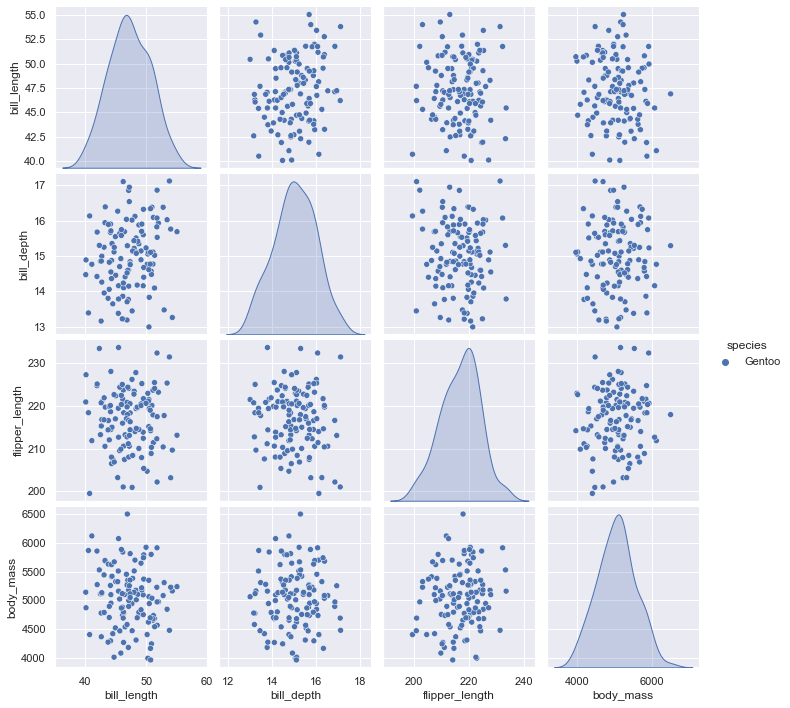

In [24]:
import seaborn as sns

sns.pairplot(df_Gentoo, hue='species')

While the individual elements look ok, there is no correlation between them. What can we do fix this?

In [25]:
adelie_df = pd.read_csv('adelie.csv')
adelie_df.describe()

,bill_length,bill_depth,flipper_length,body_mass
count,151.000000,151.000000,151.000000,151.000000
mean,38.791391,18.346358,189.953642,3700.662252
std,2.663405,1.216650,6.539457,458.566126
min,32.100000,15.500000,172.000000,2850.000000
25%,36.750000,17.500000,186.000000,3350.000000
50%,38.800000,18.400000,190.000000,3700.000000
75%,40.750000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


In [26]:
import pandas as pd
import numpy as np
df_Adelie = pd.DataFrame({'species':"Adelie",
                          'bill_length':np.random.normal(38.79, 2.66, 120),
                          'bill_depth':np.random.normal(18.34, 1.21, 120),
                          'flipper_length':np.random.normal(189.95, 6.53, 120),
                          'body_mass':np.random.normal(3700.66, 458.56, 120),
                          'gender':np.random.choice(a=['male','female'], size=120, p=[0.5,0.5])})

df_Adelie

,species,bill_length,bill_depth,flipper_length,body_mass,gender
0,Adelie,36.766439,18.904672,181.230858,4655.409773,male
1,Adelie,36.050141,18.221475,194.227507,3480.447631,female
2,Adelie,39.034463,17.930801,192.264780,4189.180009,male
3,Adelie,41.657687,19.208380,192.245744,3746.097960,male
4,Adelie,40.758709,18.512799,184.184704,4135.640232,female
...,...,...,...,...,...,...
115,Adelie,39.668161,18.689380,200.626496,3995.558698,female
116,Adelie,34.421930,18.710075,191.221029,4394.633510,female
117,Adelie,35.719436,19.114864,198.892027,3930.840455,male
118,Adelie,36.719831,18.172658,202.961796,3774.320171,male


In [39]:
# Append dataframes

result = pd.concat([df_Adelie, df_Gentoo], ignore_index=True, sort=False)
result

,species,bill_length,bill_depth,flipper_length,body_mass,gender
0,Adelie,36.766439,18.904672,181.230858,4655.409773,male
1,Adelie,36.050141,18.221475,194.227507,3480.447631,female
2,Adelie,39.034463,17.930801,192.264780,4189.180009,male
3,Adelie,41.657687,19.208380,192.245744,3746.097960,male
4,Adelie,40.758709,18.512799,184.184704,4135.640232,female
...,...,...,...,...,...,...
235,Gentoo,48.353250,15.077718,214.726610,5009.130183,female
236,Gentoo,47.350217,14.759053,216.279871,5050.194624,male
237,Gentoo,45.907634,15.747647,220.324652,5886.914441,female
238,Gentoo,47.214908,16.950060,213.078801,5254.437724,female


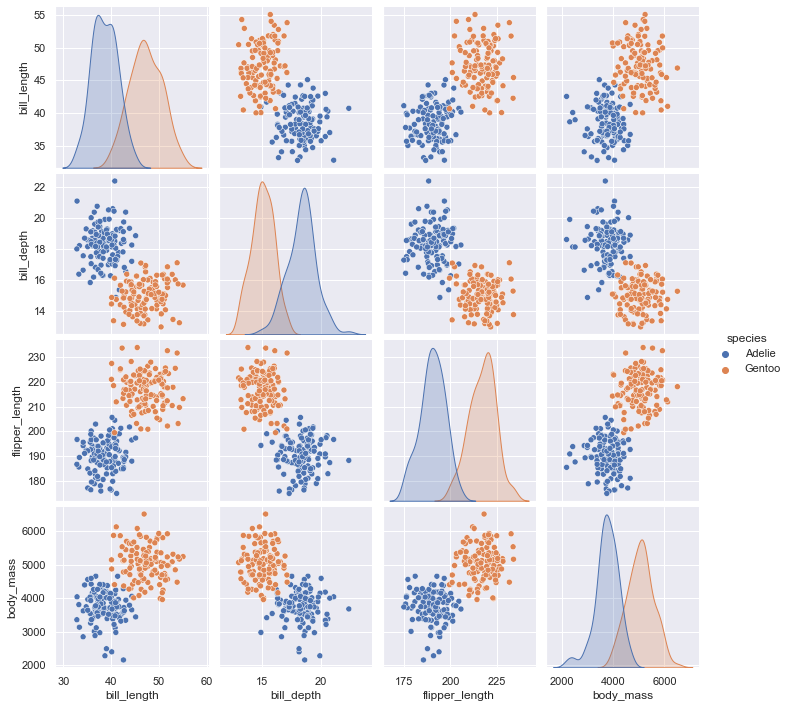

In [40]:
import seaborn as sns
sns.pairplot(result, hue='species')